## Introduction Section

#### 1) Dataset: I will analyze the  Titanic Dataset (titanic-data.csv file)

#### 2) I have the following questions, which I will try to answer in this project:
    1. Is there a correlation between the Gender of the passengers and the survival rate?
    2. Is there a correlation between the Age of the passengers and the survival rate?
    3. Is there a correlation between the ticket class (1st, 2nd, or 3rd) of the passengers and the survival rate?
  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# This cell imports all needed libraries
# Then open and read-in the titanic file and convert it to a pandas DateFrame

filename = "C:\Users\Zaki\Documents\Data Analyst Nanodegree - Udacity\P2 Titanic Analysis\\titanic-data.csv"

titanic_df = pd.read_csv(filename)

# check the loaded DataFrame and print out a description
print titanic_df.head()
print titanic_df.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
# Wrangle some data to the format needed, and clean it up

# I did not need to perform this step as Pandas already tranformed the numbers to integers, whih is great
# PassengerId, Survived, Pclass, SibSp, Parch are transformed integers!
# Name, Sex, Ticket, Cabin, Embarked columns are of type "object", this can be used as if it was a string
# Age, Fare are ransformed to floats
# also Pandas DataFrames have the functionality to remove the None or NaN vlaues/rows using the dropna() function,
# so there was no need to perform this step ahead of time.

# Tested that various fields are in the proper format for use in this program
#print titanic_df['Embarked'].dtype
#print titanic_df['Embarked']


Total Average Survival Rate for the sample of given Titanic Passengers: 38.38%



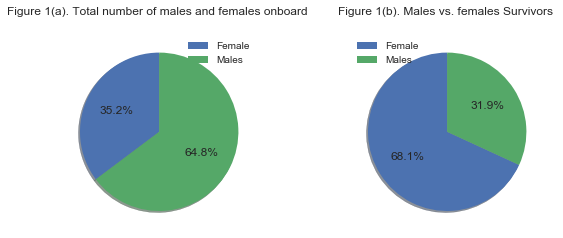

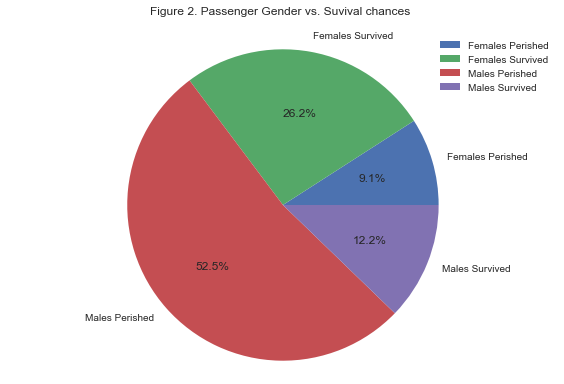

In [7]:
# Code to analyze correlation between Gender and the Survival rate

# group passengers by "Sex" and then only keep the count occuring in the Survived column
group_by_sex = titanic_df.groupby('Sex').count()['Survived']

# group passengers by "Sex" and the "Survived" columns and then only keep the count occuring in the Survived column
group_by_sex_survival = titanic_df.groupby(['Sex', 'Survived']).Survived.count()

# Calculate and print basic averge survival rate of the givem sample
Total_passengers = titanic_df['PassengerId'].count()
females_survived = group_by_sex_survival['female'][1]
males_survived = group_by_sex_survival['male'][1]
total_survived = females_survived + males_survived
    
print "Total Average Survival Rate for the sample of given Titanic Passengers: {0:.2f}%" \
      .format((float(total_survived) / Total_passengers) * 100)
print ""


# Keep only the rows for the passengers that have survived
survived_only_df = titanic_df[titanic_df.Survived == 1]

# group the records by "Sex" and "Survived" columns and obtain the Survived count
group_by_sex_survival_only = survived_only_df.groupby(['Sex', 'Survived']).Survived.count()

# Plot the Plot the total passengers broken by males and females and the Males vs. females survivors only in one chart 
# side by side for a better visual and better handling of titles and legends
fig = plt.figure()

label1 = ['Female', 'Males']

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(group_by_sex, autopct='%1.1f%%', shadow=True, startangle=90, center = (-2,0))
ax1.set_title('Figure 1(a). Total number of males and females onboard \n')
ax1.legend(label1, loc=1)

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(group_by_sex_survival_only, autopct='%1.1f%%', shadow=True, startangle=90, center = (2,0))
ax2.set_title('Figure 1(b). Males vs. females Survivors \n')
ax2.legend(label1, loc=2)

plt.show()

# Plot all the total passengers of males/females and the survivors of males/females in one chart for better analysis
labels = ['Females Perished', 'Females Survived', 'Males Perished', 'Males Survived']

group_by_sex_survival.plot.pie(labels=labels, autopct='%1.1f%%')
#group_by_sex_survival.plot.pie(figsize=(7, 7), labels=labels)

plt.legend(labels, loc="best")
plt.title("Figure 2. Passenger Gender vs. Suvival chances \n")
plt.ylabel("")
plt.axis('equal')
plt.tight_layout()

plt.show()

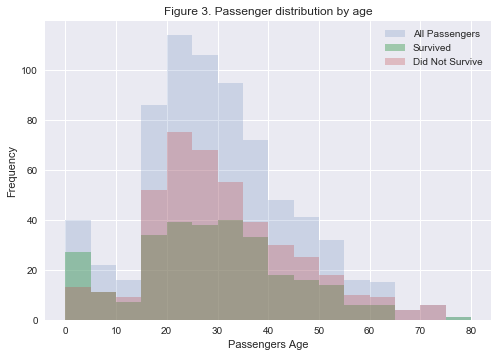

In [8]:
# analyze the correlation between Age and the Survival rate

# Keep only the rows for the passengers that have survived
survived_df = titanic_df[titanic_df.Survived == 1]
#survived_df['Age'].plot.hist(bins)
#plt.show()

# Keep only the rows for the passengers that Did not survive or have Pperished
perished_df = titanic_df[titanic_df.Survived == 0]
#perished_df['Age'].plot.hist(bins)
#plt.show()

# Plot the three figures in one chat for ease of analysis (all by age distribution):
# All the passengers vs. the passengers that survived vs. the passengers that did not survive
bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
plt.hist(titanic_df['Age'].dropna(), bins, alpha=0.2, label='All Passengers')
plt.hist(survived_df['Age'].dropna(), bins, alpha=0.5, label='Survived')
plt.hist(perished_df['Age'].dropna(), bins, alpha=0.3, label='Did Not Survive')
plt.legend()

plt.title("Figure 3. Passenger distribution by age")
plt.xlabel("Passengers Age")
plt.ylabel("Frequency")
plt.show()

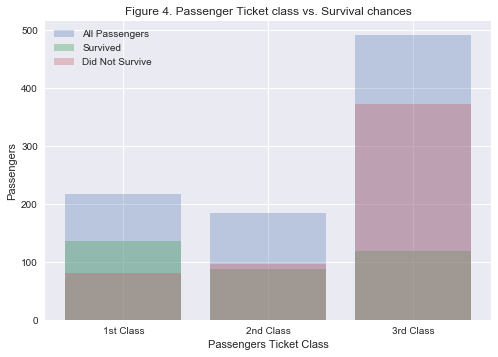

In [9]:
# Analyze correlation between the ticket class (1st, 2nd, 3rd) and the Survival rate

# group by "Pclass" or ticket class and then keep just the count occuring in the Survived column
group_by_pclass = titanic_df.groupby('Pclass').count()['Survived']

# group by "Pclass" and "Survived" columns and then keep just the count occuring in the Survived column
group_by_pclass_survival = titanic_df.groupby(['Pclass', 'Survived']).Survived.count()

# Keep only rows for the passengers that survived
pclass_survived_df = titanic_df[titanic_df.Survived == 1]

# Keep only rows for the passengers that Did nor survive (perished)
pclass_perished_df = titanic_df[titanic_df.Survived == 0]

# keep just the count occuring in the Survived column for both groups
group_by_pclass_survived = pclass_survived_df.groupby(['Pclass']).Survived.count()
group_by_pclass_perished = pclass_perished_df.groupby(['Pclass']).Survived.count()

# Create a bar chart showing all Three data sets at the same time all by tickets class distribution, first is all the 
# passengers, second is all passengers that survived, and third all those pasengers that did not survive.
x_axis = [1, 2, 3]
plt.bar(group_by_pclass.dropna().index, group_by_pclass.dropna().values, alpha=0.3, label='All Passengers')
plt.bar(group_by_pclass_survived.dropna().index, group_by_pclass_survived.dropna().values, alpha=0.4, label='Survived')
plt.bar(group_by_pclass_perished.dropna().index, group_by_pclass_perished.dropna().values, alpha=0.3, label='Did Not Survive')
plt.legend()

plt.xticks(group_by_pclass.dropna().index, ['1st Class', '2nd Class', '3rd Class'])

plt.title("Figure 4. Passenger Ticket class vs. Survival chances")
plt.xlabel("Passengers Ticket Class")
plt.ylabel("Passengers")
plt.show()

#  Analysis Outcome Section

### Q1) Is there a correlation between the Gender of the passengers and the survival rate?

### Q1 Analysis:
     From Figure 1(a) we see that the number of males passengers onboard in the given sample was much higher than the number
     of female passengers.  the male passenges was about 65%, while female passengers were about 35% of total passengers in 
     the provided sample.  Therefore one would expect that there will generally be more percentage of male survivors as 
     constitute a higher percenatge of total passengers in gthe sample, but this was not the case.
     As we can see from Figure 1(b), the males were only 32% of the survivors, while female were about 68% of the survivors
     in this sample. Essentially while males were about double the females passengers, the survival rate of females was 
     approximately double that of the females, which indicates that there is an much higher survival rate of 
     females vs. males.  
     This is also made more obvious visually in Figure 2, where all the passengers (males and females) were plotted and split
     into those that survived and those that did not in each gender category.  Male that perished were more than 52% while
     females that perished were only about 9%.  by contrast, males that survived were only about 12% vs. about 26% females.
     
     From the figures and charts generated and described above, I conclude that generally there seems to be a correlation
     between gender and survival rates**, where being a female is associated with a higher survival rate at least for the
     provided sample.
    
### Q2) Is there a correlation between the Age of the passengers and the survival rate?
### Q2 Analysis:
    As you can see in Figure 3, which is a histogram that combines Three different data sets, 1) the age distribution for all
    passengers, 2) the age distrubtion for those passengers that did not survive, and 3) the age distribution for those
    passengers that did survive all on the same chart for better analysis.
    
    As evident in the chart that the age distribution histogram for all passengers is more or less maintained in the age
    distributions for those that survived and those that did not survive, with the number of passengers that survived well
    below the number of passengers that did not survive. There are generally two exceptions to this observation for two age
    groups. The first is small group of passengers below 5 years old (i.e. children), and the second is for passengers
    generally above 65 years old.  It is evideny from the chart that children below 5 years of age had a higher survival
    rate vs. those that did not survive in the same age group, which indicates that the crew or people that were in charge
    of loading passengers on the lifeboats did favor saving young children, or even mothers that had their young children
    with them (which could also support the previous observation that more females generally survived than males).  
    We can also see from he chart that young passengers between the ages of 5-15 had a relatively higher survival rate than
    other adults, as the number that survived is close to those that did not, which is higher than the general trend of
    much less survivors in the other age groups.
    The other, allbeit,  small exception is that the survival rate for those passengers above 65 years old or older 
    passengers is relatively lower than the general trend, where most of them did not survive.
    This could be because they did not have enough strength to make it to the deck or the ofloading to the 
    lifeboats area.
    
    Generaly speaking, there does not seems to be a correlation between Age and the Survival rate, but there were two little
    exceptions mentioned above, where children generally had a better survival rate, while the older passengers had a lower
    survival rate than the general trend.  I have to say that this small exception for little children sort of restored my
    faith in humanity and the ethical behaviour of favoring saving little children when faced with a grave peril situation.
    
### Q3) Is there a correlation between the ticket class (1st, 2nd, or 3rd) of the passengers and the survival rate?
### Q3 Analysis:
    From Figure 4, which shows the distribution of passengers according to their tickets class (1st, 2nd, and 3rd) for Three
    data sets, first all the passengers, second those passengers that did not survive, and third are all the passengers that
    survive.
    From the chart we can see that those passengers holding a first class ticket had a higher survival rate (the number of 
    passengers that survived in this 1st class category is higher than those who did not survive).  while for the second 
    class passengers, the number of passengers that survived is almost the same as those passengers that did not survive.  
    And finally for those passengers that had a third-class ticket, the number of passengers that survived is much less 
    that those that did not survive.  
    So generally there seems to be a correlation where the passengers with the higher ticket class had a higher survival
    rate, but it is not clear to me why such general correlation exist.  It could be that the staff in charge of the
    lifeboats generally favored those with a higher ticket class, or may have recognized them if they were more well 
    known as more wealthy or powerful individuals, although I do not think this is a very plausible explanation.  
    Another explanation could be that the location of the cabins they were given in accordance with their higher ticket 
    class allowed them to escape or go to the surfce of the ship more quickly and therefore had a higher chance of being 
    rescued or accomodated on the lifeboats which were low in number in comparison to the total number of passengers.

### Data Limitations:
##### 1) Missing Data
        The main limitation of the provided data is that only data for 891 passengers were provided, while the actual 
        number of passengers on the Titanic was 2224, so only about 40% of the actual passengers data was provided.
        It would have been much better if all the passengers data were available in order to provide more confidence in
        the analysis results.  For example the remaining 60% of the data could have completely changed the correlations
        analyzed above to strong correlations or no correlations at all.  Therefore all the analysis done on the given
        sample although showed come correlations, but they are not conclusive as only a subset of the data is available.
        
        Also. while doing the Analysis for Q2 above, I was faced with the problem of the missing Age values for some 
        passengers. Actually out of the sample of 891 passengers, only 714 had age values (so about 20% of the Age values
        were missing).  It would have been better to have all the passengers' Ages in order to have more confidence in
        analysis results.  Also this caused some errors in the code while I was plotting the charts for the analysis of Q2.
        At first, I did not understand the errors as they were very cryptic, but then when I looked at the data and
        noticed the missing Age values, I had the idea to drop the rows with the missing Age values using the dropna()
        function, and sure enough the code worked fine when I did that.
        
        Also the passengers "Cabin" data was missing a lot of values (about 80% of the data was missing).  This prevented
        me from attempting to do any analysis using this variable, although it might have had a correlation with the
        survival rates, especially if certain Cabins were closer to the stairs leading to the deck and therefore could 
        have been associated with a higher survival rate. This analysis could have complemented the one done for Q3, where 
        there were some correlation between the 1st class passengers and higher survival rates.  Analysis of cabin numbers
        and location in the ship could have shed more light on why there seems to be a higher survival rate for 1st class
        passengers.  
    
##### 2) Data Consistency/Validity
        There was at least one entry in the Cabin column that was not consistent or valid.
        Also the Ticket column had inconsistent values of sometimes numbers, other times text of different formats.
        Fortunately I did not have to use the Ticket values, as I did not think of a good reason for it.
